In [1]:
import numpy as np
import SpectralSynthesis as ss
import matplotlib.pyplot as plt

from tqdm import tqdm

In [11]:
class perimeter_area():
    def __init__(self, field, granularity = 20):
        granularity = granularity + 2
        field = np.pad(field,10)
        self.field_min, self.field_max = np.min(field), np.max(field)
        levels = np.linspace(self.field_min,self.field_max, granularity)
        self.levels = levels[1:-1]
        contours = plt.contour(field, self.levels)
        plt.close()
        self.areas = []
        self.perimeters = []
        for i in range(len(self.levels)):
            contour = contours.collections[i]
            vs = contour.get_paths()
            area=0
            perimeter = 0
            for island in vs:
                x = island.vertices[:,0]
                y = island.vertices[:,1]
                pi = np.sum([np.sqrt(x**2+y**2) for x,y in zip(x,y)])
                ai = 0.5*np.sum(y[:-1]*np.diff(x) - x[:-1]*np.diff(y))
                area += np.abs(ai)
                perimeter += pi
            self.areas.append(area)
            self.perimeters.append(perimeter)

        self.gradient, self.intercept = np.polyfit(np.log10(self.areas), np.log10(self.perimeters), deg=1)
        self.fractal_dimension = self.gradient*2
        self.beta = 6-2*self.fractal_dimension
        self.hurst = (self.beta-2)/2
        


In [12]:
def noisy_nonperiodic_xfbm(N,E,H,S, noise=0.05, seed = None):
    X = ss.fBm(N,E,H,S, exp=True, centred = True, periodic = False, seed=seed)
    noise_fraction = noise*np.std(X.flatten())
    noise_field = ss.fBm(N=N, E=E, H=-1, exp=False)*noise_fraction

    X = X+noise_field

    X /= np.max(X.flatten())

    return X

c:\Github\thesis-images\SpectralSynthesis.py:61: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


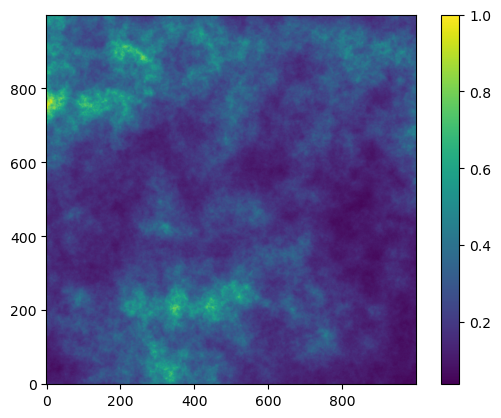

In [13]:
N=1000
H=0.5
E=2
S=1
beta = E+2*H
D = (6-beta)/2
SEED = 42

field = noisy_nonperiodic_xfbm(N, E, H, S, noise=0.05, seed=SEED)

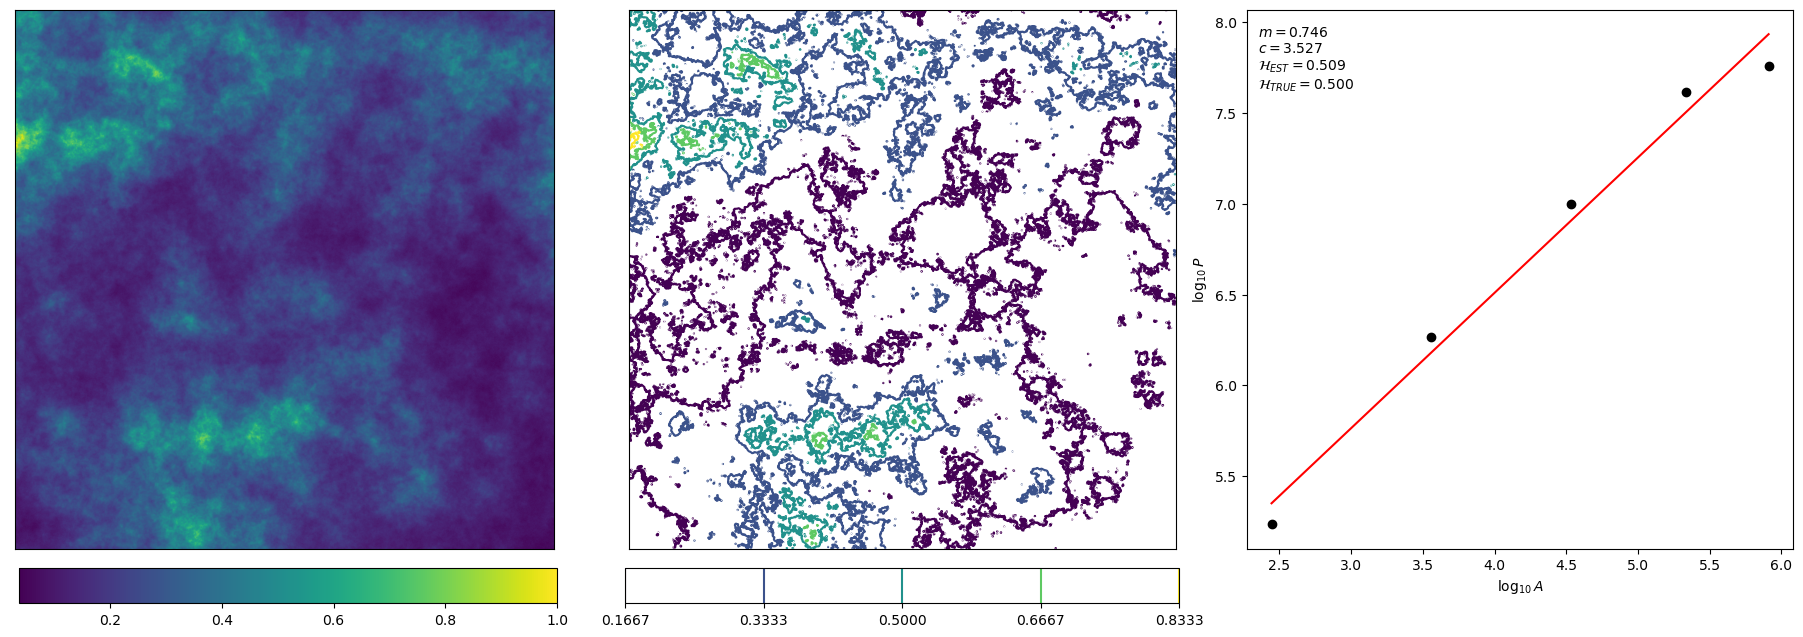

In [15]:
PA = perimeter_area(field, 5)

x_points = np.array([np.min(np.log10(PA.areas)), np.max(np.log10(PA.areas))])

f,ax = plt.subplots(1,3, figsize = (23,7))
img = ax[0].imshow(field, origin='lower')
cs = ax[1].contour(field, levels=PA.levels)
ax[2].scatter(np.log10(PA.areas), np.log10(PA.perimeters),c='k')
ax[2].plot(x_points,x_points*PA.gradient+PA.intercept,c='r')
ax[2].set_xlabel(r'$\log_{10}A$')
ax[2].set_ylabel(r'$\log_{10}P$')

ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].set_xticks([])
ax[1].set_yticks([])

text = rf"""
$m={round(PA.gradient,3):.3f}$
$c={round(PA.intercept,3):.3f}$
$\mathcal{{H}}_{{EST}}={round(PA.hurst,3):.3f}$
$\mathcal{{H}}_{{TRUE}}={round(H,3):.3f}$
"""

ax[2].text(0.02, 0.82, text, transform=ax[2].transAxes)

cbaxes = f.add_axes([0.1285, 0.032, 0.234, 0.05]) 
cb = plt.colorbar(img,orientation="horizontal", cax = cbaxes)

cbaxes2 = f.add_axes([0.392, 0.032, 0.241, 0.05]) 
cb2 = plt.colorbar(cs,orientation="horizontal", cax = cbaxes2)

f.subplots_adjust(wspace=0.13, hspace=0)

plt.savefig('D:/Workshop/PhD/Thesis/Chapter 3/PA_initial.png', bbox_inches = 'tight')
plt.show()

[  10  120  230  340  450  560  670  780  890 1000]


100%|██████████| 10/10 [14:02<00:00, 84.25s/it] 


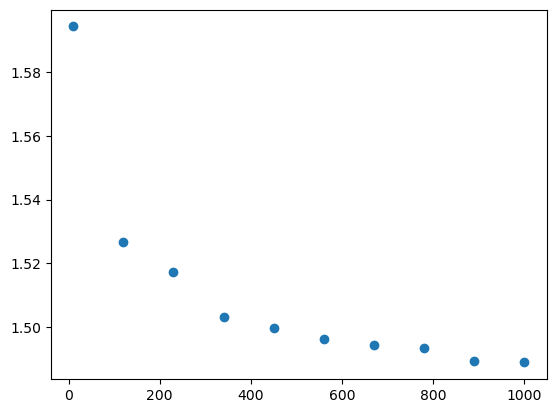

In [9]:
d = []
g = np.linspace(10,1000,10, dtype = int)
print(g)

for gs in tqdm(g):
    d.append(perimeter_area(field, gs))

plt.scatter(g,d)

In [5]:
H = np.random.uniform(0,1,100)
S = np.random.uniform(0,3,100)
D = []

for h,s in tqdm(zip(H,S), total = len(H)):
    field = ss.fBm(N,2,h,s,centred= True, exp=True)

    D.append(perimeter_area(field, 1000))

100%|██████████| 100/100 [03:46<00:00,  2.27s/it]
